In [53]:
import numpy as np
import math 
N = 15
h = (math.pi/2)/(N)
K = 800
T = 3#0.5
tau =(T)/K
if tau <= 0.5*(h*h):
    print(tau,'<=',0.5*(h*h),'Well, that`s oke')
else: 
    print('1/2 * h^2 < tau')
    print(tau,0.5*(h*h))

print(math.exp(1))
'''
def funk_1(x,t):
    return math.cos(x) * (math.cos(t) + math.sin(t))
'''
sigma=tau/(h)#tau/(h**2)
a,b,c=1,2,-2
print(a,b,c)
#'''
U_xt=np.zeros((K,N))
for k in range(K-1):
    for j in range(N-1):
        if k==0:
            U_xt[k][j]=math.cos(j*(h))*math.exp(-j*(h))
        if k==1:
            #U_xt[k][j]=math.cos(j*(h))/math.exp(j*(h))+(0.5*tau**2)*(2*math.sin(j*(h))/math.exp(j*(h)) - 2*(math.sin(j*(h))+math.cos(j*(h)))/math.exp(j*(h))-2*math.cos(j*(h))/math.exp(j*(-h)))
            U_xt[k][j]=U_xt[k-1][j]
        else:
            '''
            if j==0:
                U_xt[k][j]=math.cos(2*(k)*tau)
            elif j==N-1:
                U_xt[k][j]=0
            else:
            #'''
            U_xt[k][j]=U_xt[k-1][j+1]*(sigma**2 + sigma*tau)+U_xt[k-1][j]*(2-2*sigma**2-2*tau**2) + U_xt[k-1][j-1]*(sigma**2-tau*sigma) - U_xt[k-2][j]
            #U_xt[k][j]=U_xt[k-1][j+1]*((a**2)*(sigma**2) + b*sigma*tau/2)+U_xt[k-1][j]*(-2*(a**2)*(sigma**2)+2+c*(tau**2)) + U_xt[k-1][j-1]*((a**2)*(sigma**2)-b*tau*sigma/2) - U_xt[k-2][j]
    
    #'''
    U_xt[k][0]=math.cos(2*(k)*tau)
    U_xt[k][N-1]=0
    #'''

U_test_fix_x=[]
U_test_fix_t=[]    
for j in range(K):
    U_test_fix_x.append(U_xt[j][-1])
    
for i in range(N):
    U_test_fix_t.append(U_xt[400][i])
    
'''
U_xt=np.zeros((N,K))
for j in range (N):
    for k in range(K): 
        if j==0:
            U_xt[j][k]=math.sin(k*tau)
        else:
            if k==0:
                U_xt[j][k]=0     
            elif j==N-1:
                U_xt[j][k]=U_xt[j-1][k] - h*math.sin(k*tau)
            else:
                U_xt[j][k]=sigma*(U_xt[j+1][k-1])+(1-2*sigma)*U_xt[j][k-1] + sigma*U_xt[j-1][k-1] +tau*funk_1(j*h,k*tau)

U_xt=np.array(U_xt).copy() 
U_xt=U_xt.transpose()
#'''
      
#U_xt=np.array(U_xt).copy() 
#'''

'''2
U_xt=np.zeros((K,N))
for k in range(0,K-1):
    for j in range(1,N-1): 
        U_xt[k+1][j]=sigma*(U_xt[k][j+1])+(1-2*sigma)*U_xt[k][j] + sigma*U_xt[k][j-1] +tau*funk_1((j-1)*h,k*tau)

    U_xt[k+1][0]=math.sin((k+1)*tau)   
    U_xt[k+1][N-1]=U_xt[k+1][N-2] - h*math.sin((k+1)*tau)
        
        
U_xt=np.array(U_xt).copy() 

#'''

print(np.shape(U_xt))

0.00375 <= 0.005483113556160754 Well, that`s oke
2.718281828459045
1 2 -2
(800, 15)


In [51]:
def grafik(X,T,h,tau):
    x_x=np.arange(0,X,h)
    y_t=np.arange(0,T,tau)
    #print(len(x_x),len(y_t))
    
    xgrid,ygrid=np.meshgrid(x_x,y_t)#np.meshgrid(y_t,x_x)#
    #print(np.shape(xgrid),np.shape(ygrid))
    return xgrid,ygrid#x_x,y_t

x,y=grafik(math.pi/2,T,h,tau)

print(np.shape(x),'x','\n')
print(np.shape(y),'y','\n')
print(np.shape(U_xt),'U_xt')

'''for i in range(len(U_xt)):
    for j in range(len(U_xt[0])):
        U_xt2.append(U_xt[i][j])
        
U_xt2=np.array(U_xt2).copy() 
'''

(800, 15) x 

(800, 15) y 

(800, 15) U_xt


'for i in range(len(U_xt)):\n    for j in range(len(U_xt[0])):\n        U_xt2.append(U_xt[i][j])\n        \nU_xt2=np.array(U_xt2).copy() \n'

<IPython.core.display.Javascript object>


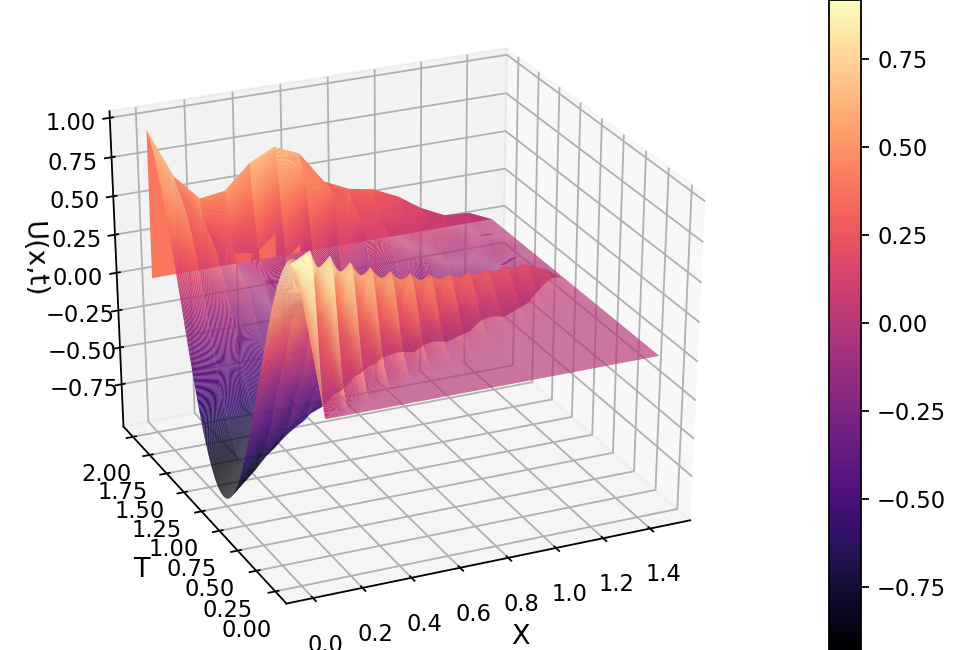

'plt.plot(x,U_xt[8])\nplt.show()'

In [54]:
%matplotlib notebook
from matplotlib import pylab as plt
from matplotlib import rcParams
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

rcParams['figure.dpi']=130
fig=plt.figure(figsize = (6,4))
axes=Axes3D(fig)

axes.set_xlabel('X', fontsize = 12)
axes.set_ylabel('T', fontsize = 12)
axes.set_zlabel('U(x,t)', fontsize = 12)

#surf=axes.plot_surface(x,y,U_xt,cmap=cm.Spectral, rstride=1, cstride=1)
#surf=axes.plot_surface(x,y,U_xt,cmap=cm.Wistia, rstride=1, cstride=1)
surf=axes.plot_surface(x,y,U_xt,cmap=cm.magma, rstride=1, cstride=1)
#axes.view_unit(30,30)
fig.colorbar(surf)
plt.show()

'''plt.plot(x,U_xt[8])
plt.show()'''

In [ ]:
U_test_fix_x=[]
U_test_fix_t=[]  

<IPython.core.display.Javascript object>


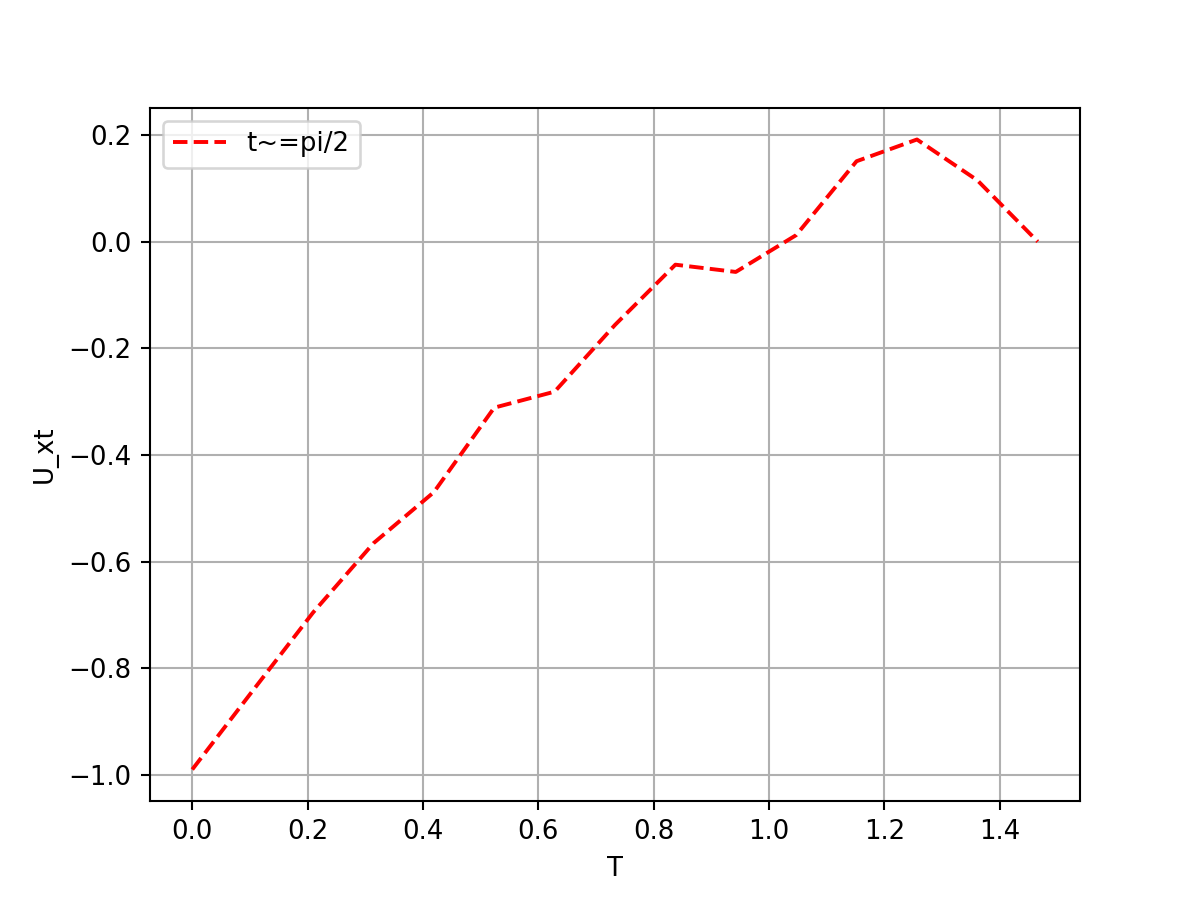

In [42]:
x_dop=np.arange(0,math.pi/2,h)
t_dop=np.arange(0,T,tau)

rcParams['figure.dpi']=150
fig,Axes=plt.subplots()


plt.plot(x_dop,U_test_fix_t,'--',color='red',label='t~=pi/2')
Axes.set_xlabel('T')
Axes.set_ylabel('U_xt')

plt.legend()
plt.grid(True)
plt.show()




<IPython.core.display.Javascript object>


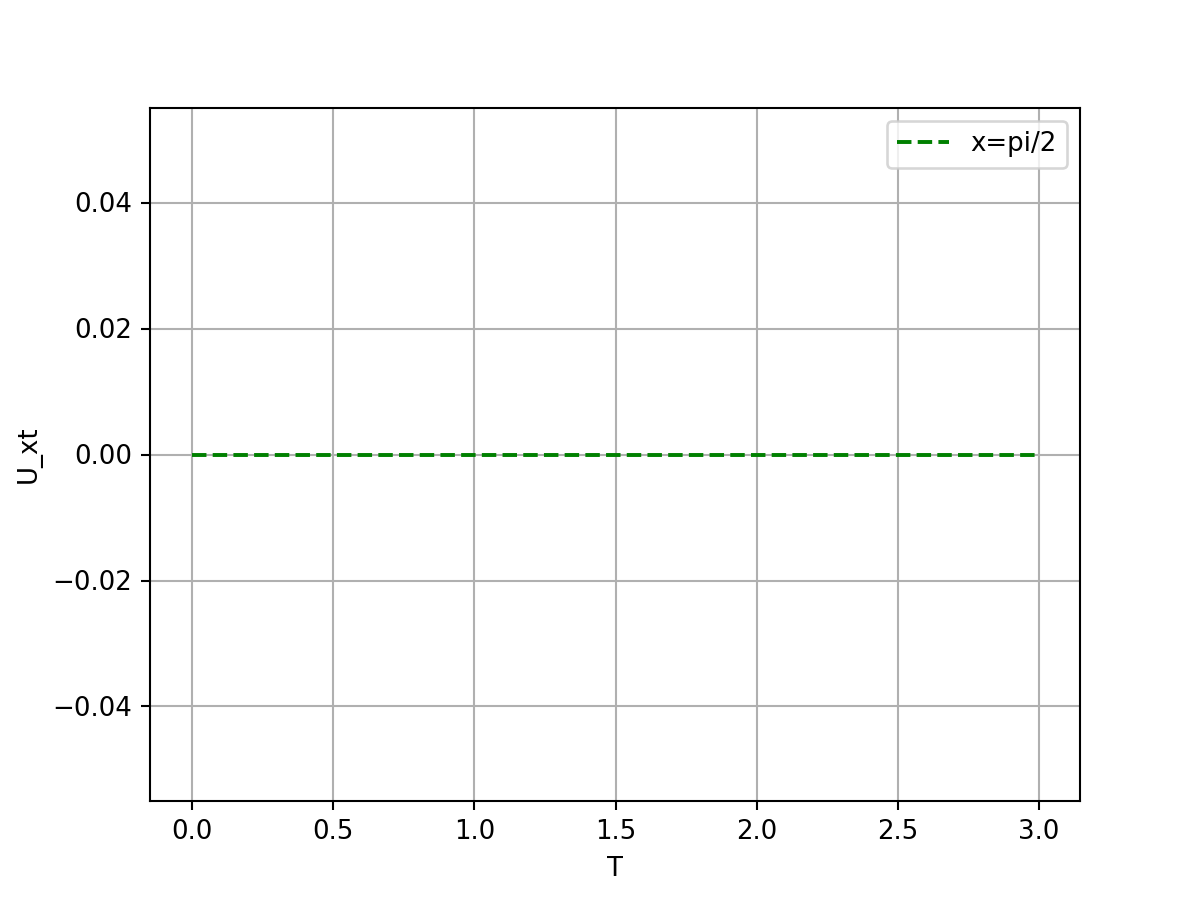

In [43]:
rcParams['figure.dpi']=150
fig,Axes=plt.subplots()

plt.plot(t_dop,U_test_fix_x,'--',color='green',label='x=pi/2')

Axes.set_xlabel('T')
Axes.set_ylabel('U_xt')

plt.legend()
plt.grid(True)
plt.show()